In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import plotly
from plotly.subplots import make_subplots

In [123]:
cd = pd.read_csv('data/churn.csv')
cd.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
cd = cd.drop('RowNumber', axis=1)
churn_data = cd.copy()
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [125]:
churn_data.columns.to_series().groupby(churn_data.dtypes).groups

{int64: ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], float64: ['Balance', 'EstimatedSalary'], object: ['Surname', 'Geography', 'Gender']}

In [126]:
churn_data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [128]:
max_unique_count = 15 # задание максимального числа уникальных категорий
for col in churn_data.columns:
    if churn_data[col].nunique() < max_unique_count:
        churn_data[col] = churn_data[col].astype('category')
display(churn_data.info())
churn_data_copy = churn_data.copy() # копия преобразованного


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  category
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  category
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(7), float64(2), int64(3), object(1)
memory usage: 538.4+ KB


None

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

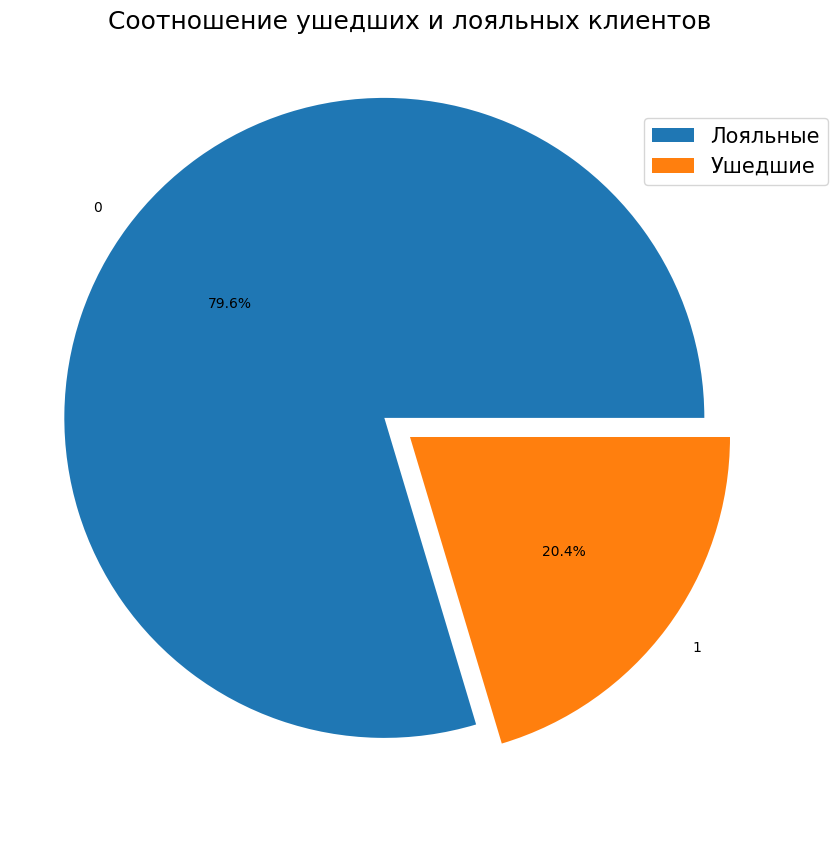

In [129]:
vaccine_combinations = churn_data['Exited'].value_counts()[:10]
fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=18)
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0,]   
);
classes = ['Лояльные', 'Ушедшие']
axes.legend(labels=classes, fontsize=15, loc=(0.792, 0.815))

На основании данного графика видно что доля ушедших клиентов составляет 20,4% от общего числа клиентов банка

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

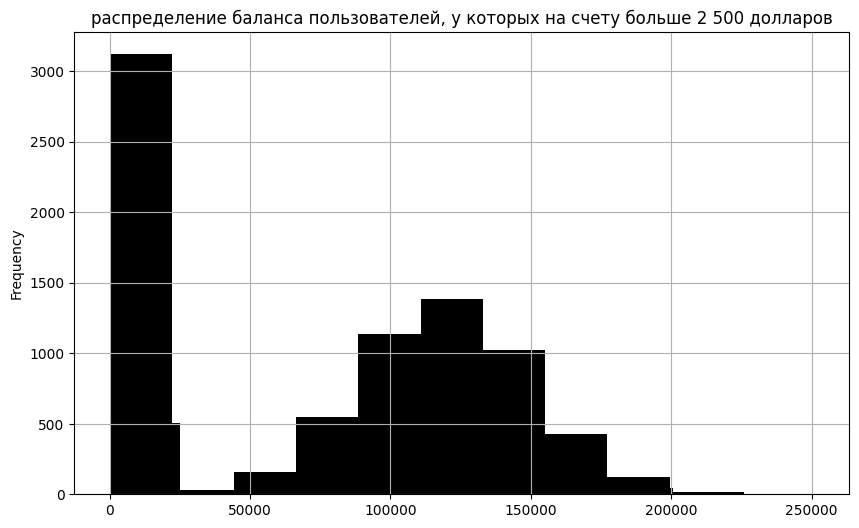

In [130]:
filtered_by_balance = churn_data[churn_data['Balance'] > 2500]
group_balance = churn_data.groupby('Exited')['Balance']#.sum()
group_balance.plot(
    kind='hist',
    figsize=(10, 6),
    title='распределение баланса пользователей, у которых на счету больше 2 500 долларов',
    grid = True,
    color = 'black',
    bins=10
);

Как следует из граффика у большего числа клиентов сумма накоплений менее 2500 долларов.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [132]:
fig1 = px.histogram(
    data_frame=churn_data, 
    x='Balance', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    title='Распределение баланса клиентов: 1 - ушедшие, 0 - лояльные', 
    nbins = 25
)
fig1.show()

fig2 = px.box(
   data_frame=churn_data,
   x='Balance', #ось абсцисс
   color='Exited',
   height=500, #высота
   width=700, #ширина
   title='Распределение баланса клиентов: 1 - ушедшие, 0 - лояльные', 
)

Как следует из данного граффика наибольший процент потерянных клиентов хранит на счете от 90 до 150 тыс долларов, возможно в банке следует сделать более интересные условия по вкладам для держателей вкладов

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [133]:
fig1 = px.histogram(
    data_frame=churn_data, 
    x='Age', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    title='Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
    nbins = 25
)
fig1.show()

fig2 = px.box(
   data_frame=churn_data,
   x='Age', #ось абсцисс
   color='Exited',
   height=500, #высота
   width=700, #ширина
   title='Распределение возраста клиентов: 1 - ушедшие, 0 - лояльные', 
)


Как видно из граффика наибольший процент клиентов потерян в группе от 50 до 59 колличество ушедших в этой группе превышает колличество лояльных

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [134]:
salary_score_data = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()
fig = px.scatter(
    data_frame = salary_score_data,
    x = 'EstimatedSalary',
    y='CreditScore',
    color='Exited',
    height=300,
    width=700,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)
fig.show()

Точки разбросаны хаотично, что означает отсутствие взаимосвязей между предполгаемой заработной платой и кредитным рейтингом. Зависимость признака оттока от двух этих признаков так же определить невозможно

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [135]:
fig = px.sunburst(churn_data, path=['Gender', 'Exited'])
fig.update_layout(margin = dict(t=30, l=0, r=0, b=0), title='Количество ушедших клиентов в разрезе пола') \
    .update_traces(texttemplate= '%{label}%{percentEntry:.2%}'
)
fig.show()

чаще уходят клиенты женского пола, как в абсолютном, так и в относительном отношении.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [148]:
fig1 = px.histogram(
    data_frame=churn_data, 
    x='NumOfProducts', #ось абсцисс
    color='Exited',
    height=500, #высота
    width=700, #ширина
    histfunc='count',
    title='Распределение продуктов клиентов: 1 - ушедшие, 0 - лояльные', 
    nbins = 25
)
fig1.show()

fig2 = px.box(
   data_frame=churn_data,
   x='NumOfProducts', #ось абсцисс
   color='Exited',
   height=500, #высота
   width=700, #ширина
   title='Распределение продуктов клиентов: 1 - ушедшие, 0 - лояльные', 
)

По имеющимся данным можно сделать вывод, что использование 3 и более продуктов не оправдывает ожиданий пользователей(по этим данным нельзя сказать про цену или качество). Пользователи двух продуктов наиболее удовлетворенны банком.
Использование одного банковского продукта недостаточно для удовлетворения запросов пользователей.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [138]:
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].cat.rename_categories({
    0 : 'not active',
    1 : 'active',
})
display(churn_data['IsActiveMember'].head())

fig = px.sunburst(churn_data, path=['IsActiveMember', 'Exited'])
fig.update_layout(margin = dict(t=30, l=0, r=0, b=0) \
    ,title='Количество ушедших клиентов в разрезе пользовательской активности') \
    .update_traces(texttemplate="%{label} %{percentEntry:.2%}")
fig.show()

0        active
1        active
2    not active
3    not active
4        active
Name: IsActiveMember, dtype: category
Categories (2, object): ['not active', 'active']

Неактивных клиентов уходит большее количество, как в абсолютном, так и в относительном отношении. Я бы рекомендовал убрать полностью или снизить комиссию, когда клиент не пользуется банковским продуктом.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [140]:
strana = cd.groupby(['Geography'], as_index=False).agg('mean')

fig = px.choropleth(
    data_frame=strana, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций
    color="Exited", #от чего зависит цвет
    hover_name='Geography',
    range_color=[0, 0.4], #диапазон цвета
    title='Доля ушедших клиентов по странам', 
    width=800, #ширина
    height=500, #высота
    color_continuous_scale=px.colors.sequential.Plasma #цвета
)

fig.show()

/var/folders/71/mrtyv_5x63jbx4zk2kls4n3m0000gn/T/ipykernel_5525/662441761.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Больше всего клиентов уходит в германии

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

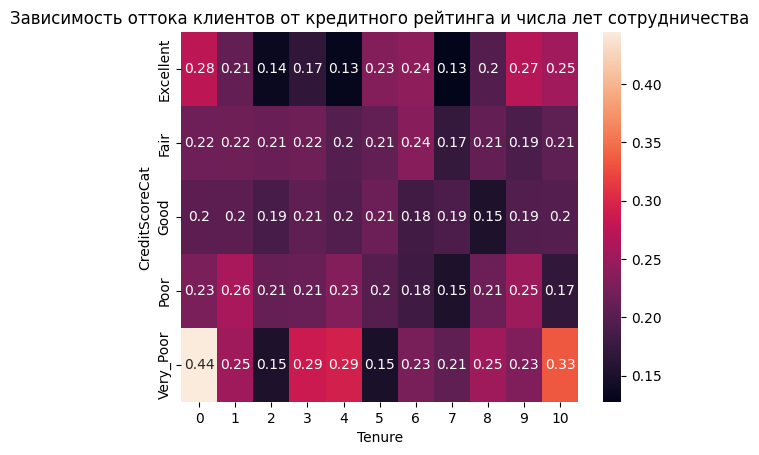

In [142]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

cd['CreditScoreCat'] = cd['CreditScore'].apply(get_credit_score_cat)
pivot = cd.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

наибольшее колличество ушедших клиентов наблюдается в категории кредитного рейтинга Very_Poor

In [149]:
#pip freeze > requirements.txt.

Note: you may need to restart the kernel to use updated packages.
